In [72]:
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("train.csv")
df = pd.read_csv("train.csv")

In [73]:
data = pd.read_csv('train.csv')
df.drop(['ID'],axis=1,inplace=True)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


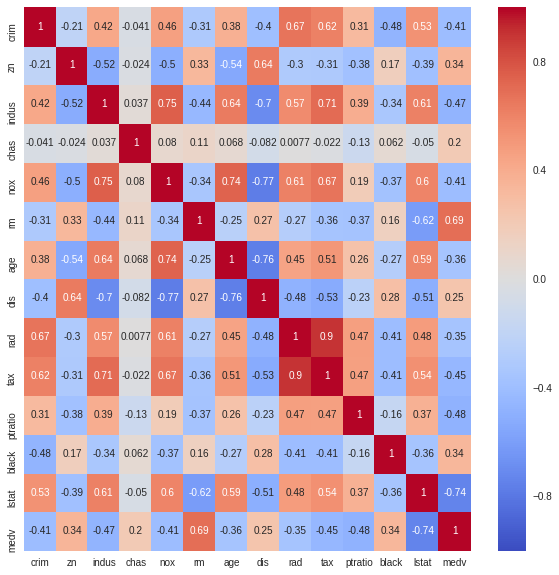

In [74]:
corr = df.corr()
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(corr, cmap = "coolwarm", annot = True)
#finding correlations

In [75]:
df=df.drop(['rad'],axis=1)
df
#dropping all correlated columns but one

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,311,15.2,395.60,12.43,22.9
5,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,311,15.2,392.52,20.45,15.0
6,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,311,15.2,396.90,13.27,18.9
7,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,311,15.2,390.50,15.71,21.7
8,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,307,21.0,396.90,8.26,20.4
9,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,307,21.0,380.02,10.26,18.2


In [76]:
temp=df[['chas','zn']]
df.drop(['chas','zn'], axis=1, inplace = True)
df
# non-categorical i.e. continous data kept,discreet data dropped

,crim,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.03237,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
3,0.06905,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2
4,0.08829,7.87,0.524,6.012,66.6,5.5605,311,15.2,395.60,12.43,22.9
5,0.22489,7.87,0.524,6.377,94.3,6.3467,311,15.2,392.52,20.45,15.0
6,0.11747,7.87,0.524,6.009,82.9,6.2267,311,15.2,396.90,13.27,18.9
7,0.09378,7.87,0.524,5.889,39.0,5.4509,311,15.2,390.50,15.71,21.7
8,0.62976,8.14,0.538,5.949,61.8,4.7075,307,21.0,396.90,8.26,20.4
9,0.63796,8.14,0.538,6.096,84.5,4.4619,307,21.0,380.02,10.26,18.2


In [77]:
df.skew()

crim       4.598981
indus      0.290434
nox        0.705552
rm         0.284028
age       -0.604644
dis        0.938143
tax        0.633027
ptratio   -0.789838
black     -2.998422
lstat      0.978328
medv       1.122472
dtype: float64

In [78]:
df['crim']=np.log(df['crim'])

In [109]:
#getting rid of outliers
df_new = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() <2).all(axis=1)]
df_new

,crim,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv
0,-5.064036,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,-3.600502,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,-3.430523,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
3,-2.672924,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2
4,-2.427128,7.87,0.524,6.012,66.6,5.5605,311,15.2,395.60,12.43,22.9
5,-1.492144,7.87,0.524,6.377,94.3,6.3467,311,15.2,392.52,20.45,15.0
6,-2.141572,7.87,0.524,6.009,82.9,6.2267,311,15.2,396.90,13.27,18.9
7,-2.366804,7.87,0.524,5.889,39.0,5.4509,311,15.2,390.50,15.71,21.7
8,-0.462416,8.14,0.538,5.949,61.8,4.7075,307,21.0,396.90,8.26,20.4
9,-0.449480,8.14,0.538,6.096,84.5,4.4619,307,21.0,380.02,10.26,18.2


In [110]:
#standardisation
df_new = (df_new - df_new.mean())/df_new.std()
df_new

,crim,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv
0,-1.975140,-1.310817,-0.037542,0.757795,-0.077842,0.188249,-0.642484,-1.757909,0.463239,-1.281518,0.364334
1,-1.262207,-0.550049,-0.743911,0.426576,0.445995,0.726349,-0.974672,-0.454785,0.463239,-0.506002,-0.035024
2,-1.179405,-1.331594,-0.856521,1.667571,-0.819625,1.398192,-1.097705,0.014340,0.392500,-1.661819,1.928486
3,-0.810355,-1.331594,-0.856521,1.988036,-0.498440,1.398192,-1.097705,0.014340,0.463239,-1.216270,2.394404
4,-0.690620,-0.422189,-0.180864,-0.453089,-0.024311,1.090399,-0.550209,-1.810034,0.422728,0.107327,0.181295
5,-0.235160,-0.422189,-0.180864,0.331942,1.034833,1.572732,-0.550209,-1.810034,0.326747,1.602433,-1.133258
6,-0.551517,-0.422189,-0.180864,-0.459542,0.598940,1.499112,-0.550209,-1.810034,0.463239,0.263922,-0.484301
7,-0.661234,-0.422189,-0.180864,-0.717634,-1.079631,1.023160,-0.550209,-1.810034,0.263798,0.718792,-0.018384
8,0.266453,-0.379037,-0.037542,-0.588588,-0.207845,0.567084,-0.574816,1.213215,0.463239,-0.670053,-0.234703
9,0.272754,-0.379037,-0.037542,-0.272425,0.660118,0.416409,-0.574816,1.213215,-0.062787,-0.297209,-0.600781


In [111]:
df_new[['chas','zn']]=temp[['chas','zn']]
X = df_new.drop(['medv'],axis=1)
Y= df_new["medv"]

In [112]:
def evaluate(X,Y,N):
    
    train_score=0
    test_score=0
    trainloss=0
    testloss=0
    
    for i in range(N):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)
        model = LinearRegression().fit(X_train,Y_train)
        train_score+=model.score(X_train,Y_train)
        test_score+=model.score(X_test,Y_test)
        Y_predtrain =model.predict(X_train)
        Y_predtest = model.predict(X_test)
        trainloss+=sklearn.metrics.mean_squared_error(Y_train, Y_predtrain)
        testloss+=sklearn.metrics.mean_squared_error(Y_test, Y_predtest)
        
    print(train_score/N)
    print(test_score/N)
    print(trainloss/N)
    print(testloss/N)

In [113]:
evaluate(X,Y,1000)

0.778990019666
0.724138600358
0.218180780062
0.271667148684
